In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [3]:
sample=pd.read_csv("/media/shridhar/9ED2FF76D2FF514F/Vehicle_insurance/sample.csv")

/home/shridhar/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,8,21,33,34,37,43,64,67,77,127,128,129,130,131,132,135,136,138,141,142,143,144,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print(sample.columns)

Index(['Unnamed: 0', 'CLMNO', 'OCCURRENCE', 'CLNTNO', 'NET_INDEMNITY_RESERVE',
       'NET_EXPENSE_RESERVE', 'CARRIERCLMNO', 'CLIENTSCLMNO', 'THIRDNUM',
       'ADJUSTER',
       ...
       'AWM_Order_Number', 'AWM_Owner_Retained_Salvage_Amount',
       'AWM_Cause_Code', 'AWM_Ref._to_Carrier_for_Recovery', 'AWM_Salvage',
       'AWM_TF_Final_Mile_Branch_Code', 'AWM_TF/Final_Mile_Contractor',
       'AWM_UST_Branch_Code', 'AWM_Van_Line', 'AWM_Voluntary_Payment'],
      dtype='object', length=148)


In [5]:
print(sample)

       Unnamed: 0        CLMNO OCCURRENCE  CLNTNO  NET_INDEMNITY_RESERVE  \
0               0  PHPB-7904A2  PHPB-7904    6902                      0   
1               1  PHPB-7905A2  PHPB-7905    6902                      0   
2               2  PHPB-7906A2  PHPB-7906    6902                      0   
3               3  PHPB-7907A2  PHPB-7907    6902                      0   
4               4  PHPB-8275A9  PHPB-8275    6902                      0   
5               5  PHPB-8276A2  PHPB-8276    6902                      0   
6               6  PHPB-8277A9  PHPB-8277    6902                      0   
7               7  PHPB-8278A9  PHPB-8278    6902                      0   
8               8  PHPB-8279A2  PHPB-8279    6902                      0   
9               9  PHPB-8280A2  PHPB-8280    6902                      0   
10             10  PHPB-8281A2  PHPB-8281    6902                      0   
11             11  PHPB-8282A2  PHPB-8282    6902                      0   
12          

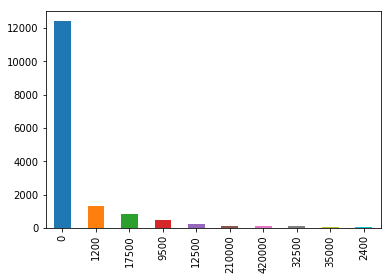

In [18]:
sample['TOTALPAID'].value_counts().head(10).plot.bar()

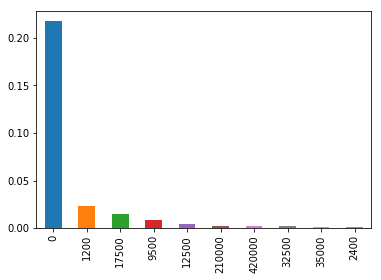

In [21]:
(sample['TOTALPAID'].value_counts().head(10) / len(sample)).plot.bar()

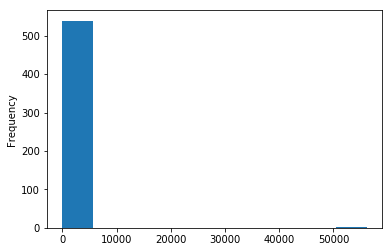

In [24]:
sample['NET_EXPENSE_RESERVE'].value_counts().sort_index().plot.hist()

AxesSubplot(0.125,0.125;0.775x0.755)


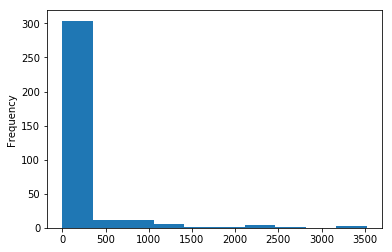

In [28]:
print(sample.groupby('ADJUSTER').size().plot.hist())


In [1]:
from scipy import stats

In [34]:
sample['OPENDATE']

0        2016-09-07
1        2016-09-07
2        2016-09-07
3        2016-09-07
4        2016-10-13
5        2016-10-13
6        2016-10-13
7        2016-10-13
8        2016-10-13
9        2016-10-13
10       2016-10-13
11       2016-06-29
12       2016-10-13
13       2017-05-09
14       2016-10-13
15       2016-10-13
16       2016-10-14
17       2016-10-14
18       2016-10-14
19       2016-10-14
20       2016-10-14
21       2016-10-14
22       2016-10-14
23       2016-10-14
24       2016-10-14
25       2016-10-14
26       2016-10-17
27       2016-10-17
28       2016-10-17
29       2016-10-17
            ...    
57030    2013-10-24
57031    2013-10-24
57032    2013-10-24
57033    2013-10-24
57034    2013-10-31
57035    2013-10-24
57036    2013-10-24
57037    2013-10-24
57038    2013-10-24
57039    2013-10-24
57040    2013-10-24
57041    2013-10-25
57042    2013-12-04
57043    2013-10-25
57044    2013-12-27
57045    2013-12-27
57046    2013-12-27
57047    2013-12-30
57048    2013-12-30


In [35]:
sample['LOSSDATE'] = pd.to_datetime(sample['LOSSDATE'], format='%Y%m%d').dt.strftime("%Y-%m-%d")

In [37]:
sample['REOPENDATE'] = pd.to_datetime(sample['REOPENDATE'], format='%Y%m%d').dt.strftime("%Y-%m-%d")

In [39]:
sample['CLOSEDATE'] = pd.to_datetime(sample['CLOSEDATE'], format='%Y%m%d').dt.strftime("%Y-%m-%d")

In [10]:
sample1['LOSSRATIO']=sample1['TOTALPAID']-sample1['NET_EXPENSE_RESERVE']

/home/shridhar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
sample1['PER_LOSSRATIO']=(sample1['LOSSRATIO']/len(sample1))*100

/home/shridhar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
claims=sample1.groupby('OPENDATE')['PER_LOSSRATIO'].sum()

In [24]:
sample1

,CLMNO,OPENDATE,NET_EXPENSE_RESERVE,TOTALPAID,LOSSRATIO,PER_LOSSRATIO
0,PHPB-7904A2,2016-09-07,0,54666,54666,95.804416
1,PHPB-7905A2,2016-09-07,0,74875,74875,131.221521
2,PHPB-7906A2,2016-09-07,0,348877,348877,611.421311
3,PHPB-7907A2,2016-09-07,0,1572154,1572154,2755.264634
4,PHPB-8275A9,2016-10-13,0,37244,37244,65.271644
5,PHPB-8276A2,2016-10-13,0,1200,1200,2.103049
6,PHPB-8277A9,2016-10-13,0,54236,54236,95.050824
7,PHPB-8278A9,2016-10-13,0,258494,258494,453.021381
8,PHPB-8279A2,2016-10-13,0,1996135,1996135,3498.308798
9,PHPB-8280A2,2016-10-13,0,0,0,0.000000


In [20]:
sample1['OPENDATE'] = pd.to_datetime(sample1['OPENDATE'], format='%Y%m%d').dt.strftime("%Y-%m-%d")

/home/shridhar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
sample1['OPENDATE']

0        2016-09-07
1        2016-09-07
2        2016-09-07
3        2016-09-07
4        2016-10-13
5        2016-10-13
6        2016-10-13
7        2016-10-13
8        2016-10-13
9        2016-10-13
10       2016-10-13
11       2016-06-29
12       2016-10-13
13       2017-05-09
14       2016-10-13
15       2016-10-13
16       2016-10-14
17       2016-10-14
18       2016-10-14
19       2016-10-14
20       2016-10-14
21       2016-10-14
22       2016-10-14
23       2016-10-14
24       2016-10-14
25       2016-10-14
26       2016-10-17
27       2016-10-17
28       2016-10-17
29       2016-10-17
            ...    
57030    2013-10-24
57031    2013-10-24
57032    2013-10-24
57033    2013-10-24
57034    2013-10-31
57035    2013-10-24
57036    2013-10-24
57037    2013-10-24
57038    2013-10-24
57039    2013-10-24
57040    2013-10-24
57041    2013-10-25
57042    2013-12-04
57043    2013-10-25
57044    2013-12-27
57045    2013-12-27
57046    2013-12-27
57047    2013-12-30
57048    2013-12-30


In [48]:
claims1=sample1.groupby('OPENDATE')['CLMNO'].count()

In [30]:
claims=pd.DataFrame(claims)

In [44]:
claims=pd.DataFrame(claims)

In [46]:
claims.columns

Index(['OPENDATE', 'PER_LOSSRATIO'], dtype='object')

In [45]:
claims.reset_index(level=0, inplace=True)

In [52]:
claims1=pd.DataFrame(claims1)

In [53]:
claims1.reset_index(level=0, inplace=True)

In [54]:
claims1.columns

Index(['OPENDATE', 'CLMNO'], dtype='object')

In [55]:
claim=pd.merge(claims,claims1,on='OPENDATE',how='inner')

In [62]:
print(len(claim['OPENDATE']))

4042


In [63]:
claim.columns

Index(['OPENDATE', 'PER_LOSSRATIO', 'CLMNO'], dtype='object')

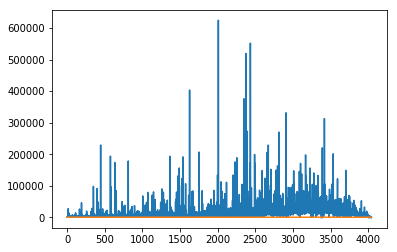

In [68]:
plt.plot(claim['PER_LOSSRATIO'])
plt.plot(claim['CLMNO'])
plt.show()

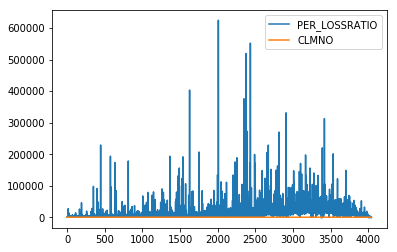

In [71]:
claim.plot(figsize=(6,4))
plt.show()

In [84]:
sm.columns

Index(['OPENDATE', 'PER_LOSSRATIO', 'CLMNO'], dtype='object')

In [77]:
from pandasql import sqldf

In [78]:
sm=sqldf("select * from claim where date(OPENDATE) >='2017-09-01' and date(OPENDATE)<='2018-09-21'")

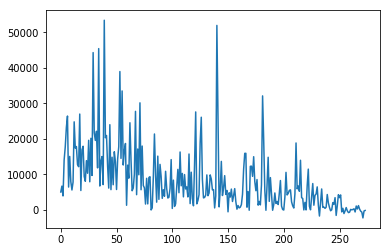

In [88]:
#plt.plot(sm['CLMNO'])
plt.plot(sm['PER_LOSSRATIO'])
plt.show()

In [94]:
sm.columns

Index(['PER_LOSSRATIO', 'CLMNO'], dtype='object')

In [89]:
sm.to_csv('/media/shridhar/9ED2FF76D2FF514F/Vehicle_insurance/lossratio.csv')

In [90]:
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [92]:
sm.set_index('OPENDATE',inplace=True)

In [93]:
ts = sm

In [95]:
X = sm['PER_LOSSRATIO'].values

In [97]:

len(X)

274

In [98]:
size = int(len(X)*.52)
train, test = X[0:size], X[size:]

In [99]:
model = ARMA(train, order=(1,0))

In [100]:
results = model.fit(trend='nc', method='css-mle')

/home/shridhar/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/shridhar/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/shridhar/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this 

In [102]:
predictions = results.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)

predicted=17809.851975, expected=855.927094
Test MSE: 41597462.535
predicted=11711.875037, expected=5661.840168
Test MSE: 41597462.535
predicted=7701.805555, expected=13676.093586
Test MSE: 41597462.535
predicted=5064.757660, expected=4061.189975
Test MSE: 41597462.535
predicted=3330.617733, expected=6212.537680
Test MSE: 41597462.535
predicted=2190.235985, expected=9661.188223
Test MSE: 41597462.535
predicted=1440.313496, expected=4374.980722
Test MSE: 41597462.535
predicted=947.159566, expected=5496.168945
Test MSE: 41597462.535
predicted=622.858320, expected=-530.187522
Test MSE: 41597462.535
predicted=409.595701, expected=4837.856642
Test MSE: 41597462.535
predicted=269.352810, expected=3624.702068
Test MSE: 41597462.535
predicted=177.128168, expected=5874.100946
Test MSE: 41597462.535
predicted=116.480641, expected=2377.213460
Test MSE: 41597462.535
predicted=76.598430, expected=4021.021732
Test MSE: 41597462.535
predicted=50.371628, expected=6003.098493
Test MSE: 41597462.535
pre

In [103]:
RMSE=sqrt(error)

In [254]:
print(RMSE)

6449.609487001873


In [109]:
rmse_accuracy=(100-error)

In [110]:
rmse_accuracy

-41597362.534824565

In [114]:
forecasted=error

In [122]:
forecasted=pd.DataFrame(test,predictions)

In [124]:
forecasted

,0
1.780985e+04,855.927094
1.171188e+04,5661.840168
7.701806e+03,13676.093586
5.064758e+03,4061.189975
3.330618e+03,6212.537680
2.190236e+03,9661.188223
1.440313e+03,4374.980722
9.471596e+02,5496.168945
6.228583e+02,-530.187522
4.095957e+02,4837.856642


In [127]:
forecasted=pd.DataFrame(forecasted)

In [128]:
forecasted

,0
1.780985e+04,855.927094
1.171188e+04,5661.840168
7.701806e+03,13676.093586
5.064758e+03,4061.189975
3.330618e+03,6212.537680
2.190236e+03,9661.188223
1.440313e+03,4374.980722
9.471596e+02,5496.168945
6.228583e+02,-530.187522
4.095957e+02,4837.856642


In [132]:
forecasted.reset_index(level=0,inplace=True)

In [136]:
forecasted.rename(columns={'index':'Actual',0:'Predicted'},inplace=True)

In [155]:
forecasted.reset_index(level=0, inplace=True)

In [143]:
sm

,OPENDATE,PER_LOSSRATIO,CLMNO
0,2017-09-01,5048.717140,8
1,2017-09-04,6707.765510,19
2,2017-09-05,3943.196635,11
3,2017-09-06,14064.707326,22
4,2017-09-07,17754.667017,30
5,2017-09-08,23249.020329,25
6,2017-09-11,26452.753242,29
7,2017-09-12,6446.607080,19
8,2017-09-13,15073.513845,23
9,2017-09-14,7960.136698,21


In [144]:
forecasted['Date']=sm['OPENDATE']

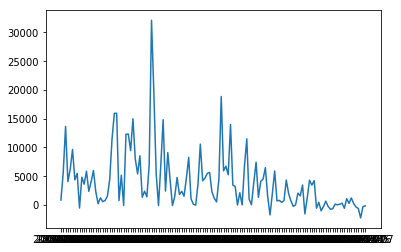

In [152]:
#plt.plot(forecasted['Actual'])
plt.plot(forecasted['Predicted'])
plt.show()

In [201]:
forecasted['MONTH']=forecasted['Date'].str.split('-',1).str[1]

In [146]:
forecasted.set_index('Date',inplace=True)

In [209]:
forecasted['month']=forecasted['MONTH'].str.split('-',0).str[0]

In [173]:
forecasted['year']=forecasted['Date'].str.split('-',0).str[0]

In [176]:
forecasted["F_date"]=forecasted["year"]+"-"+forecasted["month"]

In [178]:
del forecasted['month']

In [212]:
del forecasted['MONTH']

KeyError: 'MONTH'

In [214]:
forecasted.set_index('month',inplace=True)

In [249]:
del forecasted['month']

In [250]:
forecasted

,Date,Actual,Predicted
0,2017-09-01,1.780985e+04,855.927094
1,2017-09-04,1.171188e+04,5661.840168
2,2017-09-05,7.701806e+03,13676.093586
3,2017-09-06,5.064758e+03,4061.189975
4,2017-09-07,3.330618e+03,6212.537680
5,2017-09-08,2.190236e+03,9661.188223
6,2017-09-11,1.440313e+03,4374.980722
7,2017-09-12,9.471596e+02,5496.168945
8,2017-09-13,6.228583e+02,-530.187522
9,2017-09-14,4.095957e+02,4837.856642


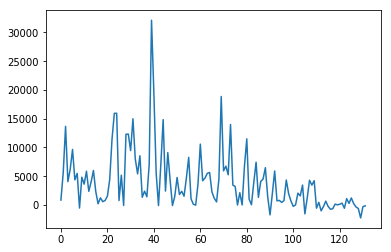

In [245]:
#plt.xlabel(forecasted['F_date'])
plt.plot(forecasted['Predicted'])
#plt.xlabel(forecasted['month'])
#plt.ylabel(forecasted['Predicted'])
plt.show()

In [225]:
max(forecasted['Date'])

'2018-03-07'

In [226]:
forecast=sqldf("select * from forecasted where date(Date)>='2018-01-01' and date(Date)<='2018-03-07'")

In [253]:
forecasted.to_csv("/media/shridhar/9ED2FF76D2FF514F/Vehicle_insurance/LossRatio.csv")